# Measuring Income Inequality

### Data Source:
A vector that contains estimates of the total income (from all sources) of a random sample of American households collected by the U.S. Census Bureau in 2019 as part of the American Community Survey (ACS).

### Objectives:
- Measure household income inequality in the United States
- How income inequality might change under a range of different tax policies

In [36]:
import numpy as np

url = 'https://raw.githubusercontent.com/nickeubank/practicaldatascience/master/Example_Data/us_household_incomes.txt'

data = np.loadtxt(url)

### Plot the income data after loading the vector of household incomes.

(array([8.77542e+05, 4.35030e+04, 1.01710e+04, 1.92100e+03, 3.98000e+02,
        1.17000e+02, 2.90000e+01, 8.00000e+00, 4.00000e+00, 2.00000e+00]),
 array([ -16942. ,  225842.5,  468627. ,  711411.5,  954196. , 1196980.5,
        1439765. , 1682549.5, 1925334. , 2168118.5, 2410903. ]),
 <BarContainer object of 10 artists>)

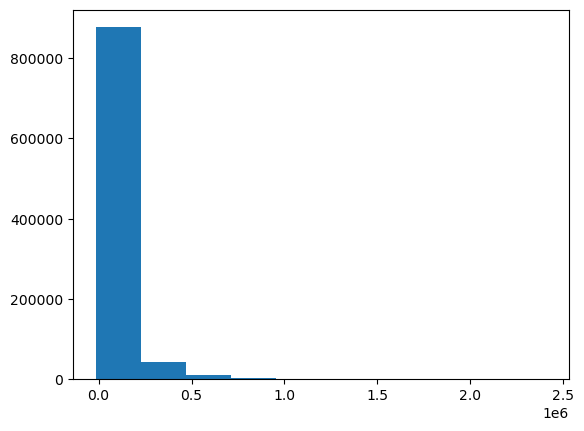

In [37]:
from matplotlib import pyplot as plt

plt.hist(data)

#### Does it look like a normal distribution? Uniform? Does this make you think that income equality is relatively high or low in the United States?

**It does not look like a normal distribution. Income equality is relatively low.**

### Create a histogram of US household incomes that includes only households making less than $500,000 to improve our ability to visualize what’s going on at lower incomes. 

(array([262190., 338722., 173615.,  76580.,  33854.,  16134.,   8329.,
          5401.,   4556.,   4038.]),
 array([-16942.,  34752.,  86446., 138140., 189834., 241528., 293222.,
        344916., 396610., 448304., 499998.]),
 <BarContainer object of 10 artists>)

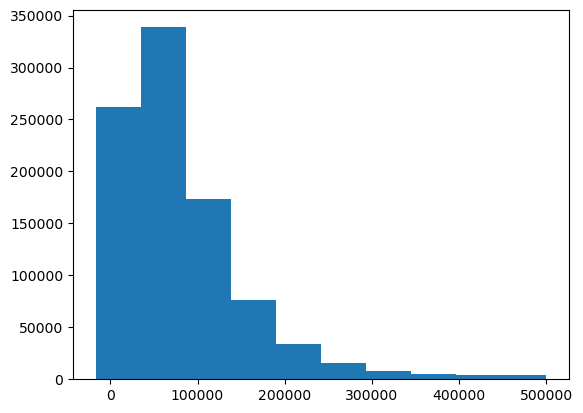

In [38]:
data_500k = data[data < 500000]

plt.hist(data_500k)

#### For these households—the non-millionaires—do we see a more uniform distribution of incomes? Or is there still a significant right-skew / positive-skew (most people are on the left of the distribution, but there are more extreme values in the right tail) in the income distribution? In other words, is the skewness in the US income distribution driven by extreme high earners, or is it evident at all income levels?

**There's still a significance amount of positive skew. The skewness appears to be evident cross income levels.**

In [39]:
from ineqpy.inequality import gini

results = {}

ex4_share_below_poverty = np.sum(data < 20000)/len(data)

results['ex4_share_below_poverty'] = ex4_share_below_poverty

print(
    "The share of US Households earning less than "
    f"$20,000 in 2008 was {ex4_share_below_poverty:.2f}"
)


The share of US Households earning less than $20,000 in 2008 was 0.15


In [40]:
#gini index
ex4_gini = gini(data) # used the whole dataset

results['ex4_gini'] = ex4_gini
print(f"The Gini Index of income inequality in the US is {ex4_gini:.2f}")

The Gini Index of income inequality in the US is 0.48


#### Compare the policies' effect on reducing income inequality:
- Policy A: giving every household that makes less than 40,000 dollars a check for 5,000 dollars, or
- Policy B: giving every household that makes less than 30,000 dollars a check for 7,000 dollars.

In [41]:
experiment1 = data.copy()
experiment1[experiment1 < 40000] += 5000
policy_a = experiment1

experiment2 = data.copy()
experiment2[experiment2 < 30000] += 7000
policy_b = experiment2

ex6_gini_policy_a = gini(policy_a)
ex6_gini_policy_b = gini(policy_b)


results['ex6_gini_policy_a'] = ex6_gini_policy_a
results['ex6_gini_policy_b'] = ex6_gini_policy_b

print(f"The Gini Index resulting of policy A is {ex6_gini_policy_a:.3f} \n"
      f"The Gini Index resulting of policy B is {ex6_gini_policy_b:.3f}")

The Gini Index resulting of policy A is 0.460 
The Gini Index resulting of policy B is 0.458


In [42]:
if ex6_gini_policy_a < ex6_gini_policy_b:
    results['ex6_gini_which_reduced_more'] = 'Policy A'
elif ex6_gini_policy_b < ex6_gini_policy_a:
    results['ex6_gini_which_reduced_more'] = 'Policy B'
else:
    results['ex6_gini_which_reduced_more'] = 'Both policies have the same impact'

print(f"Which policy lowered inequality more? {results['ex6_gini_which_reduced_more']}")


Which policy lowered inequality more? Policy B


#### A new policy C is introduced which applies a tax of 5% to households making more than 250,000 dollars and using the money to pay down the National Debt.

In [43]:
experiment3 = data.copy()
experiment3[experiment3 > 250000] *= .95
policy_c = experiment3

ex7_gini_policy_c = gini(policy_c)

results['ex7_gini_policy_c'] = ex7_gini_policy_c

print(f"The Gini Index resulting of policy C is {ex7_gini_policy_c:.2f}")

The Gini Index resulting of policy C is 0.48


#### Policy D applies a 5% tax to people making more than $250,000 and evenly distributed that tax revenue to households earning less than 30,000 dollars.

In [44]:
# Exercise 8 Part A
experiment4 = data.copy()

ex8_revenue_raised = np.sum(experiment4[experiment4 > 250000] * .05)

results['ex8_revenue_raised'] = ex8_revenue_raised

print(f"The revenue raised from policy D is ${ex8_revenue_raised:,.2f}")

The revenue raised from policy D is $929,623,340.85


In [45]:
# Exercise 9
experiment5 = data.copy()

ex9_transfers = ex8_revenue_raised / np.sum(experiment5 < 30000)

results['ex9_transfers'] = ex9_transfers

print(f"The amount of transfer the households earning less than $30,000 would receive is ${ex9_transfers:,.2f}")

The amount of transfer the households earning less than $30,000 would receive is $4,208.23


In [46]:
# Exercise 10

experiment6 = data.copy()

experiment6[experiment6 > 250000] *= 0.95
new_incomes = experiment6
experiment6[experiment6 < 30000] += ex9_transfers
new_incomes = experiment6


ex10_gini_policy_d = gini(new_incomes)

results['ex10_gini_policy_d'] = ex10_gini_policy_d

print(f"The resulting Gini index of Policy D is {ex10_gini_policy_d:.2f}")

The resulting Gini index of Policy D is 0.46


#### Policy E would distribute the revenue generated with the same tax (5% tax to people making more than $250,000), but this time we would distribute it evenly to all households earning less than $40,000 (instead of less than $30,000).

In [47]:
# Exercise 11

experiment7 = data.copy()
experiment7[experiment7 > 250000] *= 0.95

new_incomes = experiment7

experiment7[experiment7 < 40000] += (ex8_revenue_raised/ np.sum(experiment7 < 40000))

new_incomes = experiment7

ex11_gini_policy_e = gini(new_incomes)

results['ex11_gini_policy_e'] = ex11_gini_policy_e

print(f"The resulting Gini index of Policy E is {ex11_gini_policy_e:.2f}")

The resulting Gini index of Policy E is 0.46


In [48]:
results['ex12_policy_recommendation'] = 'Policy D' if ex10_gini_policy_d < ex11_gini_policy_e else 'Policy E'

print(f"The policy that has lowered inequality more is {results['ex12_policy_recommendation']}")

The policy that has lowered inequality more is Policy D


### Validation Check

In [ ]:
assert set(results.keys()) == {
    "ex4_share_below_poverty",
    "ex4_gini",
    "ex6_gini_policy_a", 
    "ex6_gini_policy_b",
    "ex6_gini_which_reduced_more",
    "ex7_gini_policy_c",
    "ex8_revenue_raised",
    "ex9_transfers",
    "ex10_gini_policy_d",
    "ex11_gini_policy_e",
    "ex12_policy_recommendation",
    "test"
}


Citation

Steven Ruggles, Sarah Flood, Sophia Foster, Ronald Goeken, Jose Pacas, Megan Schouweiler and Matthew Sobek. IPUMS USA: Version 11.0 [dataset]. Minneapolis, MN: IPUMS, 2021. https://doi.org/10.18128/D010.V11.0